In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager
rc('font', family='NanumSquareR')

# 아파트 실거래가 예측 #

In [2]:
train = pd.read_csv('./apt train.csv')

In [3]:
test = pd.read_csv('./apt test.csv')

In [4]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
transaction_id            1216553 non-null int64
apartment_id              1216553 non-null int64
city                      1216553 non-null object
dong                      1216553 non-null object
jibun                     1216553 non-null object
apt                       1216553 non-null object
addr_kr                   1216553 non-null object
exclusive_use_area        1216553 non-null float64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
transaction_date          1216553 non-null object
floor                     1216553 non-null int64
transaction_real_price    1216553 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ MB


### 유용하다고 생각되는 컬럼들만 추출 ###

In [6]:
df=train[['city','exclusive_use_area','year_of_completion','transaction_year_month','floor','transaction_real_price']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 6 columns):
city                      1216553 non-null object
exclusive_use_area        1216553 non-null float64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
floor                     1216553 non-null int64
transaction_real_price    1216553 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 55.7+ MB


findfont: Font family ['NanumSquareR'] not found. Falling back to DejaVu Sans.


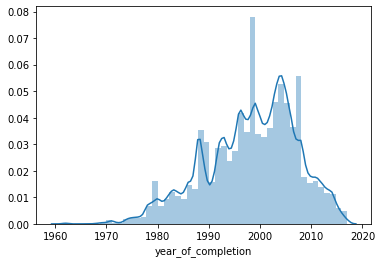

In [8]:
sns.distplot(df['year_of_completion'])
#80년대 이후로 증가하며 2000년대 중반부터 감소하는 추세이다 

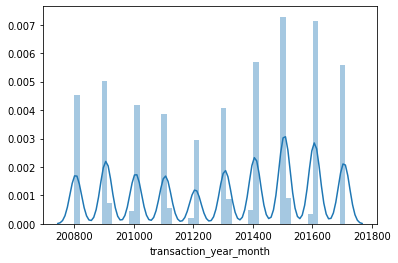

In [9]:
sns.distplot(df['transaction_year_month'])
#년월이 적혀있어 분포가 이상함 수정해야함

In [10]:
df['transaction_year_month']

0          200801
1          200801
2          200801
3          200801
4          200801
            ...  
1216548    201711
1216549    201711
1216550    201711
1216551    201711
1216552    201711
Name: transaction_year_month, Length: 1216553, dtype: int64

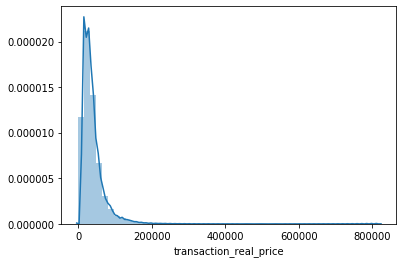

In [11]:
sns.distplot(df['transaction_real_price'])

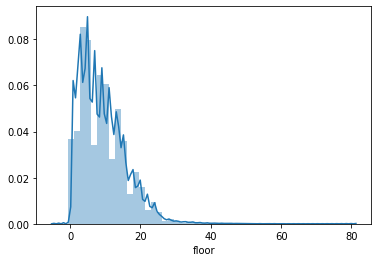

In [12]:
sns.distplot(df['floor'])

Text(0, 0.5, 'transaction_real_price')

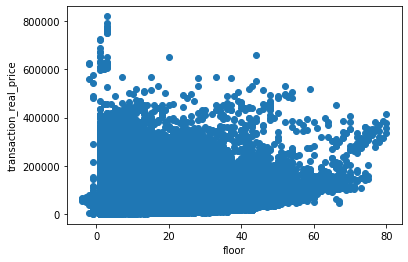

In [13]:
plt.scatter(df['floor'], df['transaction_real_price'])
plt.xlabel('floor')
plt.ylabel('transaction_real_price')
#층수에 따른 실거래가 분포 

Text(0, 0.5, 'transaction_real_price')

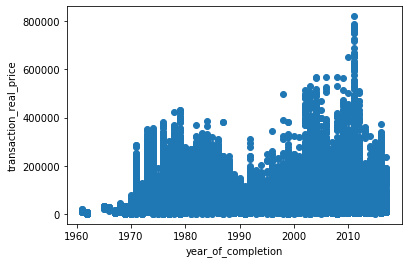

In [14]:
plt.scatter(df['year_of_completion'], df['transaction_real_price'])
plt.xlabel('year_of_completion')
plt.ylabel('transaction_real_price')
#완공년도에 따른 실거래가 
#완공년도가 최근일수록 실거래가가 높다 

Text(0, 0.5, 'transaction_real_price')

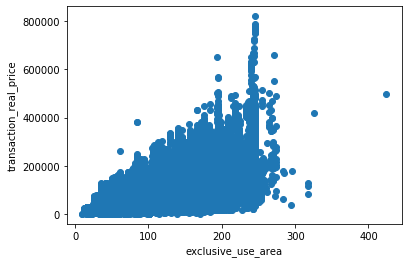

In [15]:
plt.scatter(df['exclusive_use_area'], df['transaction_real_price'])
plt.xlabel('exclusive_use_area')
plt.ylabel('transaction_real_price')


In [16]:
df['transaction_real_price'].describe()

count    1.216553e+06
mean     3.822769e+04
std      3.104898e+04
min      1.000000e+02
25%      1.900000e+04
50%      3.090000e+04
75%      4.700000e+04
max      8.200000e+05
Name: transaction_real_price, dtype: float64

In [17]:
df.groupby(['city'])['transaction_real_price'].describe()
#대략적으로 서울이 부산보다 실거래가가 약2배정도 높은것을 알 수 있다 

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
부산광역시,474268.0,21102.045856,14032.400080,100.0,12000.0,18000.0,26500.0,412787.0
서울특별시,742285.0,49169.779317,33868.323394,350.0,29000.0,40000.0,58000.0,820000.0


## Random Forest ##

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
df.columns

Index(['city', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'floor', 'transaction_real_price'],
      dtype='object')

In [20]:
df['city'] = pd.get_dummies(df['city'])
#city가 string이므로 더미변수를 만들어서 랜덤포레스트에 적용해야한다

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df.head()

,city,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
0,0,84.82,2002,200801,2,37500
1,0,99.17,1973,200801,6,20000
2,0,84.74,2007,200801,6,38500
3,0,146.39,2003,200801,15,118000
4,0,194.43,2004,200801,3,120000


In [22]:
y=df['transaction_real_price']
X=df.drop('transaction_real_price', axis=1)

In [23]:
X.isnull().sum()

city                      0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
floor                     0
dtype: int64

In [25]:
y.isnull().sum()

0

In [24]:
X

,city,exclusive_use_area,year_of_completion,transaction_year_month,floor
0,0,84.8200,2002,200801,2
1,0,99.1700,1973,200801,6
2,0,84.7400,2007,200801,6
3,0,146.3900,2003,200801,15
4,0,194.4300,2004,200801,3
...,...,...,...,...,...
1216548,1,59.8245,2012,201711,3
1216549,1,84.9923,2012,201711,7
1216550,1,84.9923,2012,201711,9
1216551,1,101.7400,2008,201711,7


In [47]:
df

,city,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
0,0,84.8200,2002,200801,2,37500
1,0,99.1700,1973,200801,6,20000
2,0,84.7400,2007,200801,6,38500
3,0,146.3900,2003,200801,15,118000
4,0,194.4300,2004,200801,3,120000
...,...,...,...,...,...,...
1216548,1,59.8245,2012,201711,3,22000
1216549,1,84.9923,2012,201711,7,30750
1216550,1,84.9923,2012,201711,9,29500
1216551,1,101.7400,2008,201711,7,26700


In [49]:
X_test

,city,exclusive_use_area,year_of_completion,transaction_year_month,floor
1098039,0,49.4500,1975,201705,4
432251,0,59.9000,1998,201309,9
565937,0,91.9600,2014,201607,1
448502,0,45.2000,1977,200808,5
439435,0,53.3700,1987,201505,4
...,...,...,...,...,...
325728,0,114.6500,1998,201502,9
144513,0,59.3800,2010,201605,11
618613,0,84.5300,2009,200904,11
912904,1,84.9885,2006,201607,4


In [50]:
X_test['year_of_completion']

1098039    1975
432251     1998
565937     2014
448502     1977
439435     1987
           ... 
325728     1998
144513     2010
618613     2009
912904     2006
978918     2001
Name: year_of_completion, Length: 304139, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [28]:
#test와 train셋을 나누지 않음 다시해야함 

In [71]:
rf=RandomForestRegressor(n_estimators=30)
rf.fit(X,y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [72]:
pred=rf.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)**0.5

3420.4082903159697

### 결론 : transaction_real_price의 예측값과 실제값의 차이는 대략 3427정도 차이가 나는것을 알 수 있다 
#### n_stimator를 올리면 예측값과 실제값의 차이는 줄어든다

가중치 : 건축년도

In [74]:
rf1=RandomForestRegressor(n_estimators=30)
rf1.fit(X,y,sample_weight=train['year_of_completion'])



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [75]:
real=y_test
yc=X_test['year_of_completion']

In [76]:
pred1=rf1.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred1,sample_weight=yc)**0.5

3433.811038720412

가중치 : 아파트의 층 

In [77]:
rf2=RandomForestRegressor(n_estimators=30)
rf2.fit(X,y,sample_weight=train['floor'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [78]:
fl=X_test['floor']

In [83]:
pred2=rf2.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred2,sample_weight=fl)**0.5
#fl에 결측값이 존재 

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:397: RuntimeWarning: invalid value encountered in add
  out[0] += prediction
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [84]:
fl.isnull().sum()

0